In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def slit_cylinder(X):
    """
    Create initial conditions F(X) for an array X
    """
    
    F = np.array([])
    
    for x in X:
        
        if x >= 0.12 and x <= 0.13:
            
            F = np.append(F, 0.9)
            
        elif x >= 0.05 and x <= 0.25:
            
            F = np.append(F, 1)
            
        else:
            
            F = np.append(F, 0)
    
    return F


def get_P_matrix(M, factor):
    """    
    
         0 |    I
    P = ------------
         I | D*factor
    
    0: zero matrix
    I: unit matrix
    D: 
    """
    
    # Unit matrix
    unit_matrix = np.identity(M)
    
    # Zero matrix
    zero_matrix = np.zeros((M,M))

    # Create D matrix
    diagonal = [0]*M      # diagonals
    s_upper  = [1]*(M-1)  # upper subdiagonal
    s_lower  = [-1]*(M-1) # lower subdiagonal

    D = np.diag(diagonal) + np.diag(s_upper, k=1) + np.diag(s_lower, k=-1)

    D[M-1,0] = 1
    D[0,M-1] = -1
    
    
    # concatenate submatrices
    P_left  = np.concatenate((zero_matrix, unit_matrix), axis = 0)
    P_right = np.concatenate((unit_matrix, D*factor), axis = 0)
    P       = np.concatenate((P_left, P_right), axis = 1)
    
    
    return P

In [56]:
M  = 201  # number of intervals in space
Lx = 1    # maximum value in space
X  = np.linspace(0, Lx, M)

F0 = slit_cylinder(X)  # start values

time_steps = 500  # max time steps

cn = 0.9  # CFL-number

In [70]:
F      = np.zeros((M*2, (t_max+1)*2))  # +1 to store initial cond. in Matrix
F[:,0] = np.concatenate((F0, F0), axis=0)

for i in range(0, time_steps+1):
    if i == 0:
        # Euler-forward for first time step (justified P)
        factor = -0.5*cn
        P = get_P_matrix(M, factor)
        F[:,i+1] = np.matmul(P, F[:,i])
        
    else:
        # leap frog in time, centered in space method
        factor = -1.*cn
        P = get_P_matrix(M, factor)
        F[:,i+1] = np.matmul(P, F[:,i])

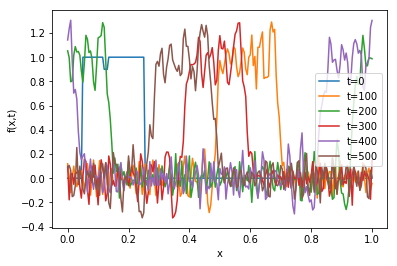

In [85]:
for t in range(0,time_steps+1,100):
    plt.plot(X, F[0:M,t], label="t={}".format(t))
plt.xlabel("x")
plt.ylabel("f(x,t)")
plt.legend()
plt.show()

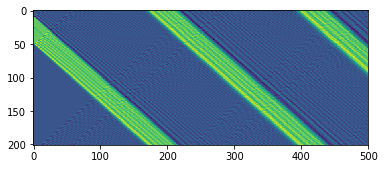

In [86]:
plt.imshow(F[0:M,0:t_max])
plt.show()